<a href="https://colab.research.google.com/github/shivamkrishna1000/House-Price-Prediction/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [11]:
house_price=pd.read_csv('/content/HousingData.csv')

In [12]:
house_price.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
house_price.shape

(506, 14)

In [14]:
house_price.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [15]:
house_price.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
print(house_price.std().mean())

25.51098302717849


In [19]:
correlation=house_price.corr()

<Axes: >

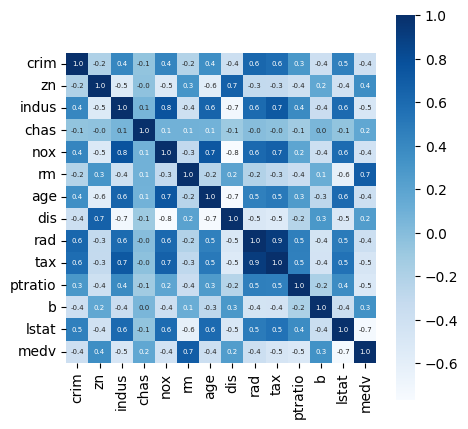

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':5},cmap='Blues')

In [31]:
x=house_price.drop(columns='medv',axis=1)

In [32]:
y=house_price['medv']

In [33]:
print(x)
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889 

In [46]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)

In [47]:
model=XGBRegressor()

In [48]:
model.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
trainingpredict=model.predict(train_x)

In [50]:
score_1=metrics.r2_score(train_y,trainingpredict)
score_2=metrics.mean_absolute_error(train_y,trainingpredict)
print(score_1)
print(score_2)

0.9999980039471451
0.0091330346494618


In [51]:
testingpredict=model.predict(test_x)

In [52]:
score_3=metrics.r2_score(test_y,testingpredict)
score_4=metrics.mean_absolute_error(test_y,testingpredict)
print(score_3)
print(score_4)

0.9051721149855378
2.0748727686264927
